In [4]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('Medicalpremium.csv')

Data Cleaning and Preperation

In [6]:
# first 5 rows of the dataframe
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
# Conversion rate (1 USD = 73.5 INR)
conversion_rate = 83

# Convert 'PremiumPrice' from INR to USD (PremiumPrice is in Yearly costs)
insurance_dataset['PremiumPrice'] = insurance_dataset['PremiumPrice'] / conversion_rate

In [8]:
# first 5 rows of the dataframe after the conversion
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,301.204819
1,60,1,0,0,0,180,73,0,0,0,349.397590
2,36,1,1,0,0,158,59,0,0,1,277.108434
3,52,1,1,0,1,183,93,0,0,2,337.349398
4,38,0,0,0,1,166,88,0,0,1,277.108434


In [9]:
# number of rows and columns
insurance_dataset.shape

(986, 11)

In [10]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 84.9 KB


In [11]:
# checking for missing values
insurance_dataset.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

Data Analysis

In [12]:
# statistical Measures of the dataset
insurance_dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,293.213422
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,75.279330
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,180.722892
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,253.012048
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,277.108434
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,337.349398
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,481.927711


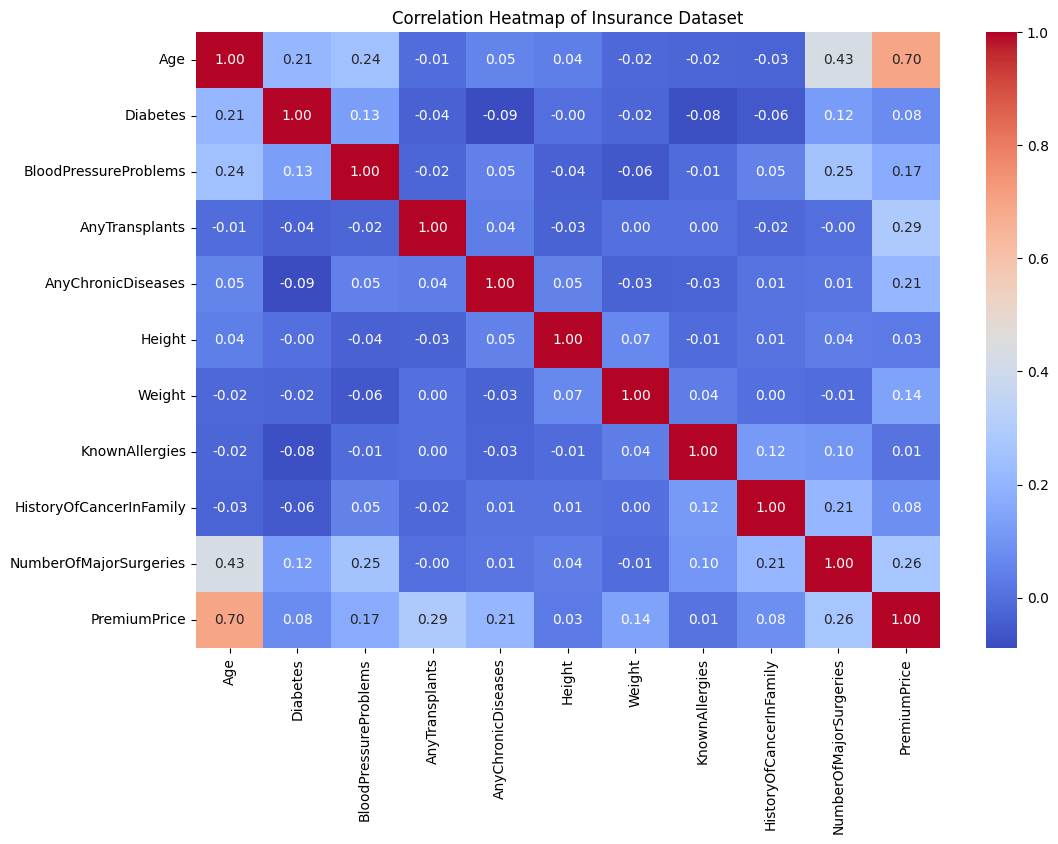

In [13]:
# Compute the correlation matrix
correlation_matrix = insurance_dataset.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Insurance Dataset')
plt.show()

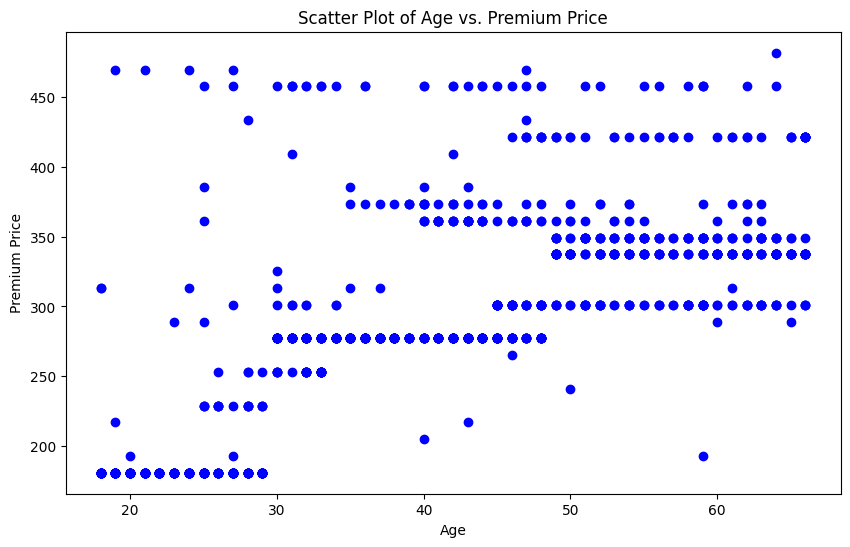

In [14]:
# Sample data from 'insurance_dataset'
# Assuming insurance_dataset is a DataFrame
# insurance_dataset = your_dataframe_here

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(insurance_dataset['Age'], insurance_dataset['PremiumPrice'], c='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Scatter Plot of Age vs. Premium Price')

# Show the plot
plt.show()

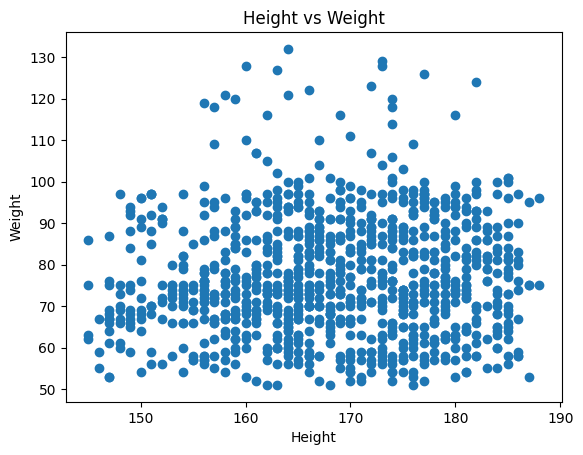

In [15]:
# Height measured in cm and Weight in kg
plt.scatter(insurance_dataset['Height'], insurance_dataset['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

C:\Users\novojona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\novojona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\novojona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

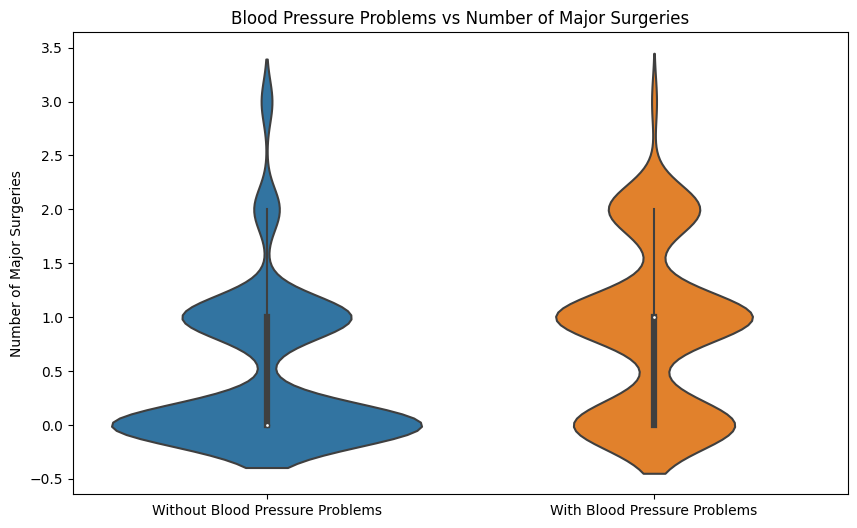

In [16]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(x='BloodPressureProblems', y='NumberOfMajorSurgeries', data=insurance_dataset)

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Without Blood Pressure Problems', 'With Blood Pressure Problems'])
plt.ylabel('Number of Major Surgeries')
plt.xlabel('')
plt.title('Blood Pressure Problems vs Number of Major Surgeries')

# Show the plot
plt.show()

Seperating the Data and Training Model

In [17]:
# Feature and Target Variables
features = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
            'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 
            'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

target = 'PremiumPrice'

In [18]:
# Train-Test Split
X = insurance_dataset[features]
y = insurance_dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Scaling for continuous variables
scaler = StandardScaler()
scaling_columns = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [20]:
# Gradient Boosting Model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [24]:
# Predictions and Performance
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
import math
rmse = math.sqrt(mse)
relative_error = mse / np.var(y_test)
print(f'Mean Squared Error: {mse}')
print(f'Square Root of Mean Squared Error: {rmse}')
print(f'Relative Error: {relative_error}')
total_premium_price = insurance_dataset['PremiumPrice'].sum()
print("Total sum of PremiumPrice:", total_premium_price)

Mean Squared Error: 895.1878546366336
Square Root of Mean Squared Error: 29.91969008256325
Relative Error: 0.14461879502162958
Total sum of PremiumPrice: 289108.4337349398
